### **71220856 - Vincen Imanuel - Prediksi Perawatan Pesawat**
## **Algoritma yang digunakan dalam forecasting: Decision Tree Regression**

# **Pengecekan Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Membaca file csv menggunakan fungsi dari panda. File csv saya upload dulu ke folder yang sama dengan halaman code ini. (saya upload ke folder collab ini), data yang saya gunakan data train dan saya beri nama "data-train-pesawat".

In [4]:
dt = pd.read_csv("data-train-pesawat.csv")

Periksa ukuran dataset.

In [26]:
dt.shape

(20631, 71)

Periksa isi data dengan menampilkan beberapa baris yang paling awal dari csv.

In [27]:
dt.head(20)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0,0.000000,0,0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0,0.000000,0,0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0,1.154701,0,0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0,1.000000,0,0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0,1.095445,0,0,0.073621,0.033498,187,0,0
5,1,6,-0.0043,-0.0001,100,518.67,642.10,1584.47,1398.37,14.62,...,0.025727,0,1.140175,0,0,0.051186,0.031436,186,0,0
6,1,7,0.0010,0.0001,100,518.67,642.48,1592.32,1397.77,14.62,...,0.023476,0,1.140175,0,0,0.086718,0.021634,185,0,0
7,1,8,-0.0034,0.0003,100,518.67,642.56,1582.96,1400.97,14.62,...,0.022477,0,0.836660,0,0,0.086487,0.034405,184,0,0
8,1,9,0.0008,0.0001,100,518.67,642.12,1590.98,1394.80,14.62,...,0.020740,0,0.836660,0,0,0.077136,0.038939,183,0,0
9,1,10,-0.0033,0.0001,100,518.67,641.71,1591.24,1400.46,14.62,...,0.020493,0,0.836660,0,0,0.062849,0.058103,182,0,0


Berdasarkan data dan informasi yang saya dapatkan.

- id: digunakan sebagai pengidentifikasi pesawat atau entitas perawatan.

- cycle: siklus penerbangan

- setting1, setting2, setting3: parameter pengaturan operasional pesawat.

- s1 - s2: pebacaan sensor dari pesawat seperti suhu, tekanan, kecepatan, getaran, dan parameter fisik lain.

- av1 - av21: nilai rata-rata untuk masing-masing sensor

- sd1 - sd21: standar deviasi untuk masing-masing sensor

- ttf: time to failure, perkiraan waktu hingga kegagalan berikutnya atau perawatan diperlukan

- label_bnc: label yang menunjukkan status baik atau tidak baik

- label_mcc: label yang menunjukkan status/kategori dari pesawat

In [5]:
dt.info() # Melihat informasi umum mengenai dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 71 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         20631 non-null  int64  
 1   cycle      20631 non-null  int64  
 2   setting1   20631 non-null  float64
 3   setting2   20631 non-null  float64
 4   setting3   20631 non-null  int64  
 5   s1         20631 non-null  float64
 6   s2         20631 non-null  float64
 7   s3         20631 non-null  float64
 8   s4         20631 non-null  float64
 9   s5         20631 non-null  float64
 10  s6         20631 non-null  float64
 11  s7         20631 non-null  float64
 12  s8         20631 non-null  float64
 13  s9         20631 non-null  float64
 14  s10        20631 non-null  float64
 15  s11        20631 non-null  float64
 16  s12        20631 non-null  float64
 17  s13        20631 non-null  float64
 18  s14        20631 non-null  float64
 19  s15        20631 non-null  float64
 20  s16   

In [6]:
dt.dtypes # Melihat tipe data dari tiap kolom

id             int64
cycle          int64
setting1     float64
setting2     float64
setting3       int64
              ...   
sd20         float64
sd21         float64
ttf            int64
label_bnc      int64
label_mcc      int64
Length: 71, dtype: object

In [7]:
dt.head(20) # Perhatikan lagi isi data

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0,0.000000,0,0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0,0.000000,0,0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0,1.154701,0,0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0,1.000000,0,0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0,1.095445,0,0,0.073621,0.033498,187,0,0
5,1,6,-0.0043,-0.0001,100,518.67,642.10,1584.47,1398.37,14.62,...,0.025727,0,1.140175,0,0,0.051186,0.031436,186,0,0
6,1,7,0.0010,0.0001,100,518.67,642.48,1592.32,1397.77,14.62,...,0.023476,0,1.140175,0,0,0.086718,0.021634,185,0,0
7,1,8,-0.0034,0.0003,100,518.67,642.56,1582.96,1400.97,14.62,...,0.022477,0,0.836660,0,0,0.086487,0.034405,184,0,0
8,1,9,0.0008,0.0001,100,518.67,642.12,1590.98,1394.80,14.62,...,0.020740,0,0.836660,0,0,0.077136,0.038939,183,0,0
9,1,10,-0.0033,0.0001,100,518.67,641.71,1591.24,1400.46,14.62,...,0.020493,0,0.836660,0,0,0.062849,0.058103,182,0,0


Bisa dilihat bahwa ada beberapa variabel yang semua isi dari datanya sama. Menurut saya, data yang sama semua itu tidak akan berpengaruh pada prediksi, karena tidak ada variasinya dan tidak mengubah faktor untuk mempengaruhi prediksi. Tidak ada perubahan di sana akan menyebabkan tidak ada juga faktor untuk prediksi karena tidak terjadi perubahan pada parameter untuk melakukan prediksi. Maka dari itu, data variabel tersebut tidak saya gunakan.

Data yang saya maksud adalah:
- setting3

s untuk sensor
- s1
- s5
- s6
- s10
- s16
- s18
- s19

av untuk average dari tiap sensor
- av1
- av5
- av6
- av10
- av16
- av18
- av19

sd untuk standar deviasi dari sensor
- sd1
- sd5
- sd6
- sd10
- sd16
- sd18
- sd19

Data tersebut akan saya hapus menggunakan drop

In [8]:
target_hapus = ['setting3', 's1', 's5', 's6', 's10', 's16', 's18', 's19', 'av1', 'av5', 'av6', 'av10', 'av16', 'av18', 'av19','sd1', 'sd5', 'sd6', 'sd10', 'sd16', 'sd18', 'sd19']
dt = dt.drop(columns=target_hapus)
print(dt.head(5))

   id  cycle  setting1  setting2      s2       s3       s4      s7       s8  \
0   1      1   -0.0007   -0.0004  641.82  1589.70  1400.60  554.36  2388.06   
1   1      2    0.0019   -0.0003  642.15  1591.82  1403.14  553.75  2388.04   
2   1      3   -0.0043    0.0003  642.35  1587.99  1404.20  554.26  2388.08   
3   1      4    0.0007    0.0000  642.35  1582.79  1401.87  554.45  2388.11   
4   1      5   -0.0019   -0.0002  642.37  1582.85  1406.22  554.00  2388.06   

        s9  ...      sd12      sd13      sd14      sd15      sd17      sd20  \
0  9046.19  ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  9044.07  ...  0.438406  0.035355  5.041671  0.008697  0.000000  0.042426   
2  9052.94  ...  0.404475  0.026458  3.717450  0.007640  1.154701  0.055076   
3  9049.48  ...  0.495950  0.029439  3.050906  0.028117  1.000000  0.076322   
4  9055.15  ...  0.432574  0.025884  2.651326  0.025953  1.095445  0.073621   

       sd21  ttf  label_bnc  label_mcc  
0  0.0000

Jika diperhatikan, baris pertama pada bagian sensornya berisi 0 semua. Maka baris ini akan saya eliminasi.

In [9]:
dt = dt.drop(index=0)
print(dt.head(5))

   id  cycle  setting1  setting2      s2       s3       s4      s7       s8  \
1   1      2    0.0019   -0.0003  642.15  1591.82  1403.14  553.75  2388.04   
2   1      3   -0.0043    0.0003  642.35  1587.99  1404.20  554.26  2388.08   
3   1      4    0.0007    0.0000  642.35  1582.79  1401.87  554.45  2388.11   
4   1      5   -0.0019   -0.0002  642.37  1582.85  1406.22  554.00  2388.06   
5   1      6   -0.0043   -0.0001  642.10  1584.47  1398.37  554.67  2388.02   

        s9  ...      sd12      sd13      sd14      sd15      sd17      sd20  \
1  9044.07  ...  0.438406  0.035355  5.041671  0.008697  0.000000  0.042426   
2  9052.94  ...  0.404475  0.026458  3.717450  0.007640  1.154701  0.055076   
3  9049.48  ...  0.495950  0.029439  3.050906  0.028117  1.000000  0.076322   
4  9055.15  ...  0.432574  0.025884  2.651326  0.025953  1.095445  0.073621   
5  9049.68  ...  0.425417  0.023452  0.958697  0.025727  1.140175  0.051186   

       sd21  ttf  label_bnc  label_mcc  
1  0.0032

Datanya sudah bersih.

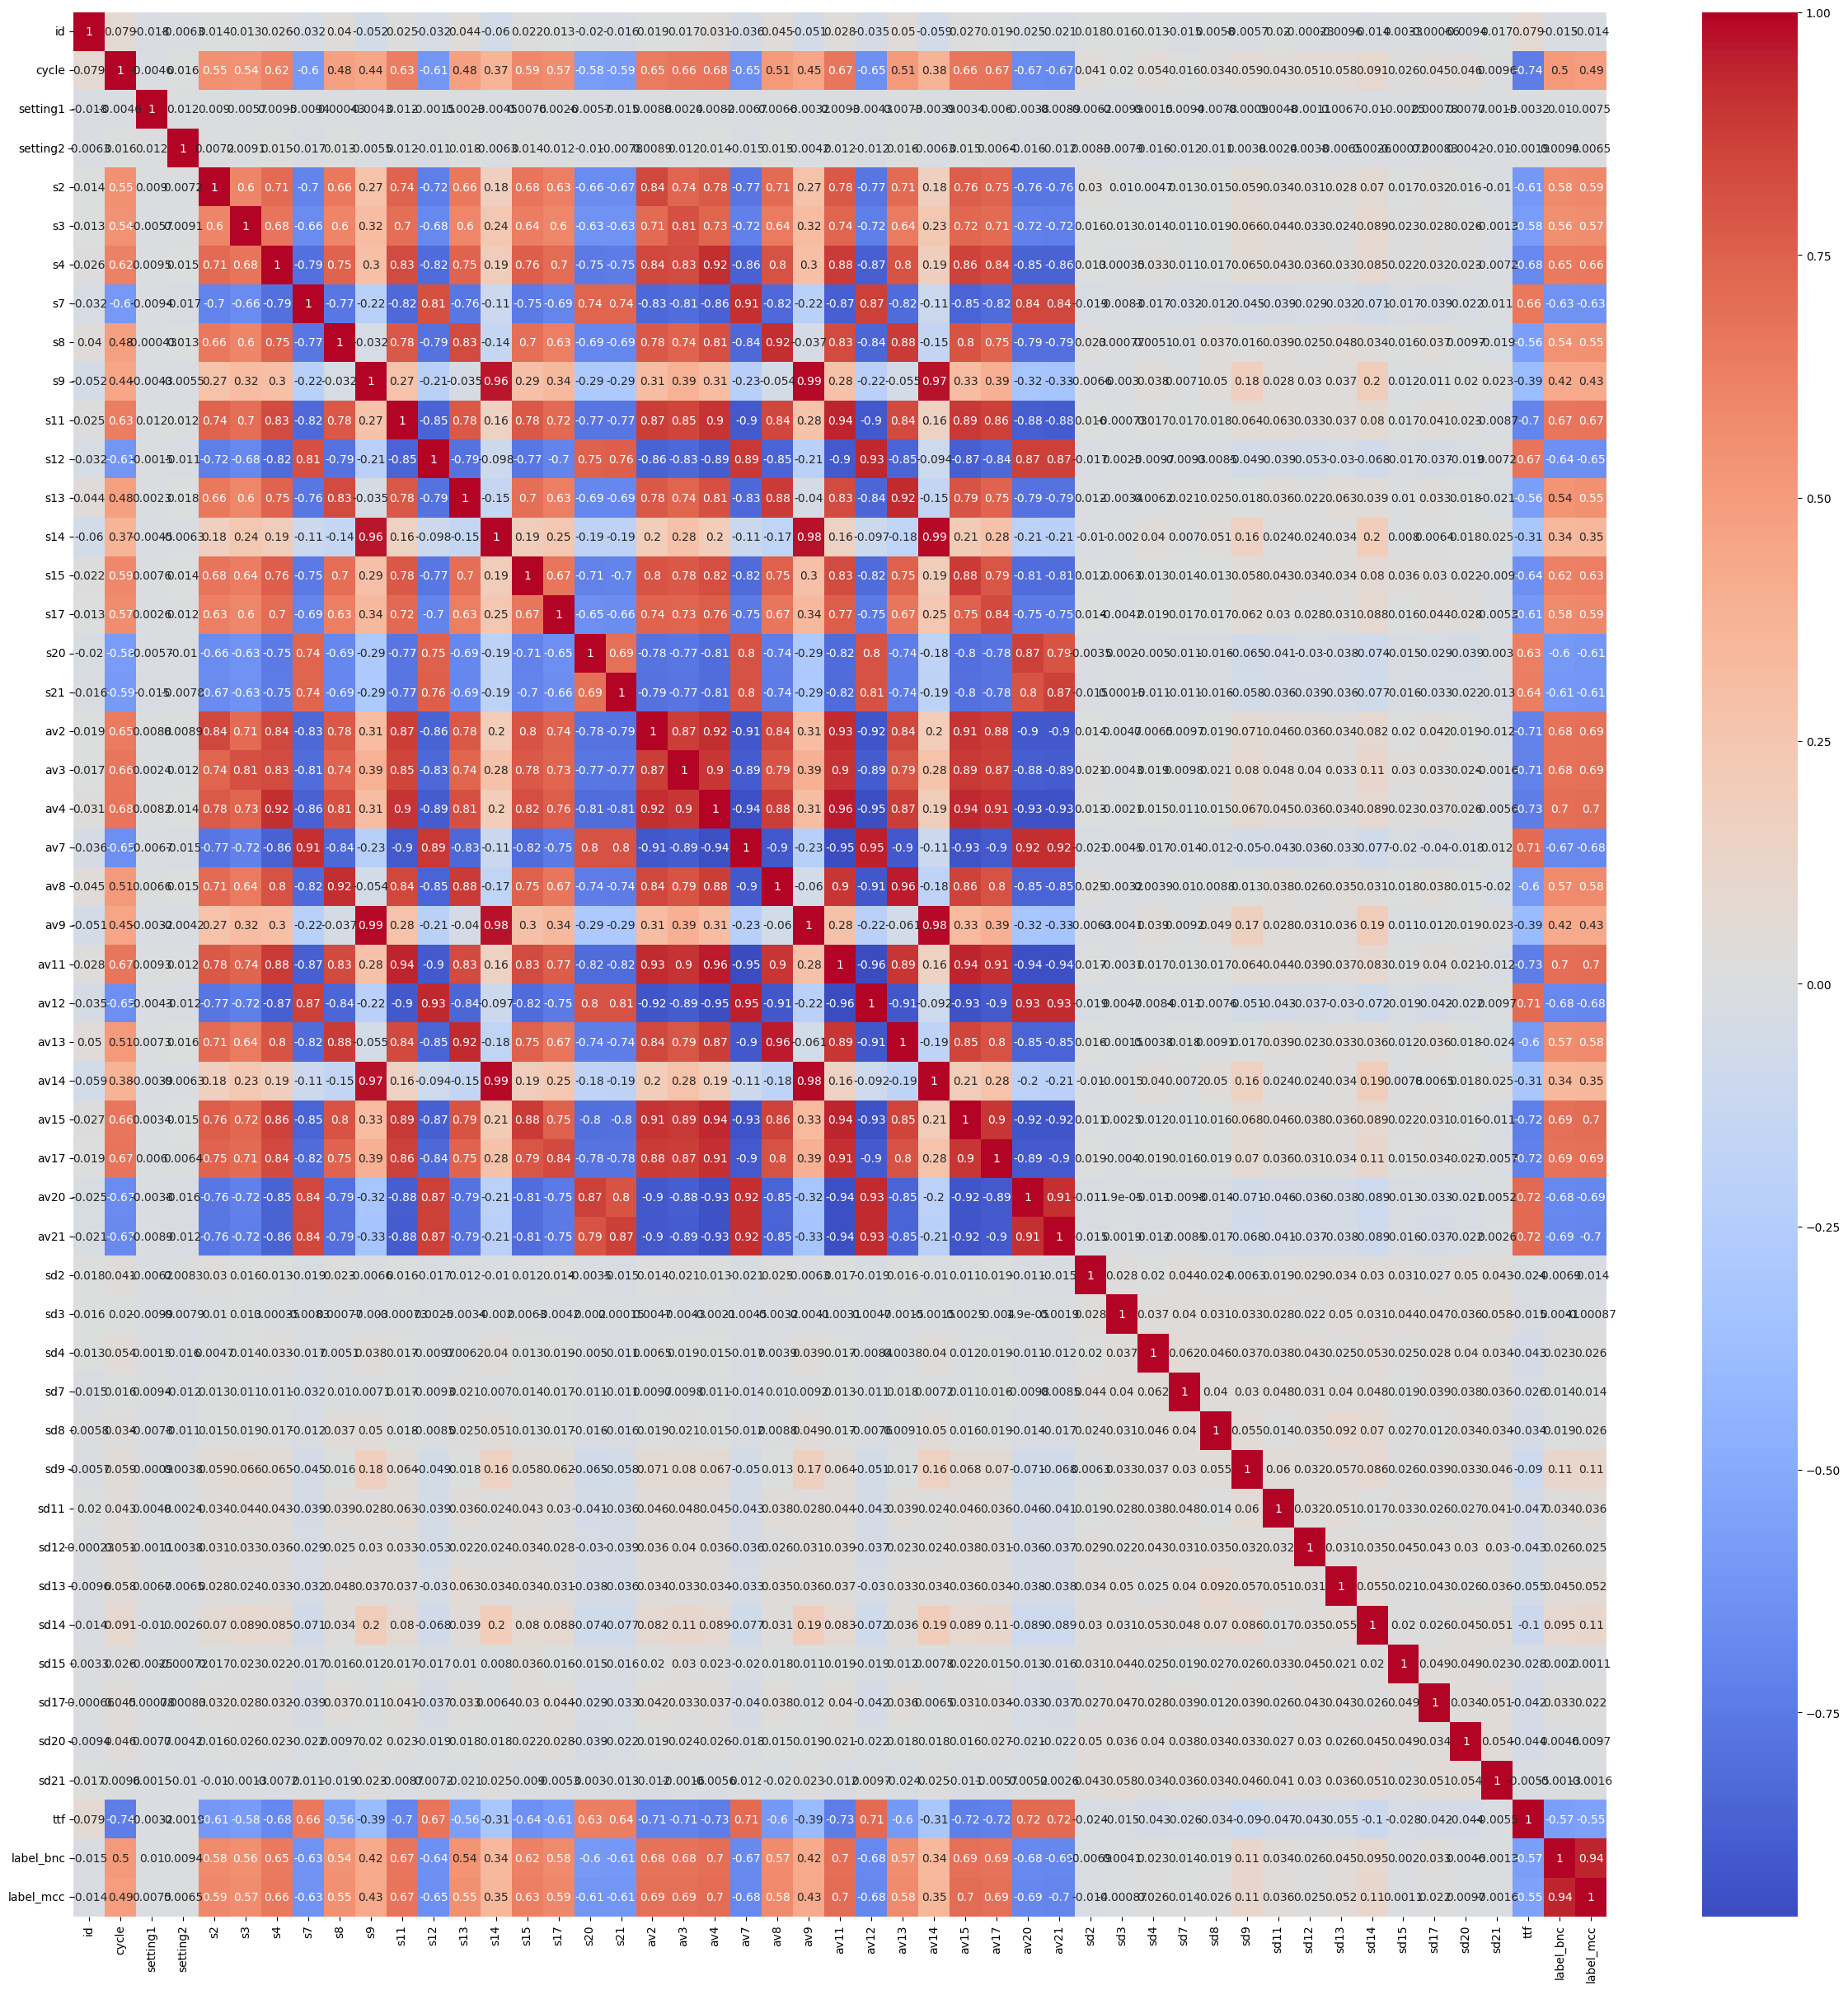

In [10]:
# Karena data memiliki banyak sekali variable, saya lihat korelasinya menggunakan heat-
# map untuk mencari data yang paling cocok digunakan sebagai parameter untuk-
# prediksi (yang mendekati angka 1 adalah yang paling cocok)
import matplotlib.pyplot as plt
import seaborn as sns

korelasi = dt.corr(method="pearson")
plt.figure(figsize=(30, 30))
sns.heatmap(korelasi, cmap='coolwarm', annot=True)
plt.show()

Dari heatmap di atas, korelasi variabel yang mendekati angka 1 yaitu s4, s7, s8, s9, s11, s12, s13, s14, av2, av3, av4, av7, av8, av9, av11, av12, av13, av14, av15, av17, av20, av21

# **Buat Model (Decision Tree Regression)**

Mengapa saya menggunakan Decision Tree Regression? Karena data yang dipakai tidak linear, memiliki banyak fitur, dan model ini lebih mudah dipahami.

In [11]:
# Saya lakukan splitting data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

x = dt[['s4', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 'av2', 'av3', 'av4', 'av7', 'av8', 'av9', 'av11', 'av12', 'av13', 'av14', 'av15', 'av17', 'av20', 'av21']]
y = dt['label_bnc'] # Prediksi label_bnc

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=41)

In [12]:
# Buat model
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)

DecisionTreeRegressor()

# **Mencoba Model (Test Output)**

In [28]:
# Fitur yang dipakai: ['s4', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 'av2', 'av3', 'av4', 'av7', 'av8', 'av9', 'av11', 'av12', 'av13', 'av14', 'av15', 'av17', 'av20', 'av21']

# Contoh inputan
s4 = 1406.22
s7 = 553.88
s8 = 2388.07
s9 = 9073.7
s11 = 47.46
s12 = 521.6
s13 = 2388.07
s14 = 8149.44
av2 = 642.56
av3 = 1587.538
av4 = 1404.694
av7 = 553.83
av8 = 2388.062
av9 = 9072.474
av11 = 47.422
av12 = 521.794
av13 = 2388.066
av14 = 8151.064
av15 = 8.41674
av17 = 393
av20 = 38.89
av21 = 23.30752


# Masukkan variabel-variabel inputan ke dalam list
list_fitur = [s4, s7, s8, s9, s11, s12, s13, s14,
              av2, av3, av4, av7, av8, av9, av11,
              av12, av13, av14, av15, av17, av20, av21]

fitur = np.array([list_fitur])
hasil_bnc = model.predict(fitur) # Hasil prediksi label_bnc akan ditampung di sini

###
###

# Saya juga akan lakukan prediksi label_mcc
y = dt['label_mcc'] # Prediksi label_mcc
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=41)
# Buat model
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
hasil_mcc = model.predict(fitur) # Hasil prediksi label_mcc akan ditampung di sini


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


## Output

In [29]:
# Hasil output prediksi
print("Prediksi label_bnc: ", int(hasil_bnc[0]))
print("Prediksi label_mcc: ", int(hasil_mcc[0]))

Prediksi label_bnc:  0
Prediksi label_mcc:  0


# **Evaluasi Model**

Alasan saya menggunakan metrik di bawah ini adalah karena metrik-metrik tersebut sangat cocok untuk forecasting dengan algoritma regression.

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prediksi nilai
prediksi = model.predict(xtest) # xtest ini hanya variable untuk pengujian

## Evaluasi pertama, saya akan menggunakan MAE.

Mean Absolute Error (MAE) antara nilai sebenarnya (ytest) dan prediksi yang dihasilkan oleh model. MAE adalah rata-rata dari nilai absolut dari selisih antara prediksi dan nilai sebenarnya. **Semakin rendah nilai MAE, semakin baik kinerja model**. Saya menggunakan fungsi mean_absolute_error dari scikit-learn untuk menghitung MAE.

In [52]:
# Hitung MAE
mae = mean_absolute_error(ytest, prediksi)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.07513330101793504


## Evaluasi kedua, saya gunakan MSE

Saya menghitung Mean Squared Error (MSE) antara nilai sebenarnya (ytest) dan prediksi yang dihasilkan oleh model. MSE adalah rata-rata dari kuadrat dari selisih antara prediksi dan nilai sebenarnya. Saya menggunakan fungsi mean_squared_error dari scikit-learn untuk menghitung MSE. **Semakin rendah nilai MSE, semakin baik kinerja model.**

In [53]:
# Hitung MSE
mse = mean_squared_error(ytest, prediksi)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.08337372758119244


## Evaluasi ketiga, saya pakai RMSE

RMSE adalah akar kuadrat dari MSE dan memberikan penilaian kesalahan dalam satuan yang sama dengan variabel target. **Semakin rendah nilai RMSE, semakin baik kinerja model**. Saya menggunakan fungsi np.sqrt() untuk menghitung akar kuadrat dari MSE.

In [54]:
# Hitung RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.28874509100795537


## Evaluasi keempat, saya gunakan Koefisien Determinasi

In [55]:
# Evaluasi Koefisien Determinasi untuk mengecek kinerja model
# Koefisien ini semakin mendekati angka 1 semakin baik, hasil akan saya ubah ke persentase
from sklearn.metrics import r2_score

# Hitung R^2
r_squared = r2_score(ytest, prediksi)
print("Koefisien Determinasi (R^2):", r_squared*100, "%")

Koefisien Determinasi (R^2): 75.53471022811499 %


# **Kesimpulan**

Menurut saya, model ini bisa dibilang sudah memiliki kinerja yang cukup baik karena memiliki nilai Mean Error yang terbilang sangat rendah dan nilai Koefisien Determinan yang cukup tinggi.